In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from dateutil import parser
from datetime import datetime
import json

In [2]:
df1 = pd.read_csv("../dataset/TRAIN_Consumptions.csv")

In [3]:
df1.head()

,ACCT_NBR,SUCCESSOR,BS_RATE,MS_METER_NBR,CSS_MS_HS_USE,MEASUREMENT_DATE
0,329855,1,13,0,56,2019-08-26
1,113886,1,11,1,2236,2022-03-10
2,219271,1,13,2,678,2021-04-20
3,245307,1,13,3,156,2022-04-27
4,250806,1,13,4,502,2022-06-03


In [4]:
len(df1)

9201394

In [5]:
df1.dtypes

ACCT_NBR             int64
SUCCESSOR            int64
BS_RATE             object
MS_METER_NBR         int64
CSS_MS_HS_USE        int64
MEASUREMENT_DATE    object
dtype: object

In [6]:
df1.ACCT_NBR.nunique()

459826

In [7]:
df1.MS_METER_NBR.nunique()

475643

In [8]:
df1['MEASUREMENT_DATE'] = pd.to_datetime(df1['MEASUREMENT_DATE'])

In [9]:
min(df1['MEASUREMENT_DATE']), max(df1['MEASUREMENT_DATE'])

(Timestamp('2018-01-01 00:00:00'), Timestamp('2022-10-01 00:00:00'))

In [10]:
counts = df1.resample('M', on='MEASUREMENT_DATE').count()

In [11]:
counts.head()

,ACCT_NBR,SUCCESSOR,BS_RATE,MS_METER_NBR,CSS_MS_HS_USE
MEASUREMENT_DATE,,,,,
2018-01-31,176660,176660,176660,176660,176660
2018-02-28,161743,161743,161743,161743,161743
2018-03-31,185364,185364,185364,185364,185364
2018-04-30,156874,156874,156874,156874,156874
2018-05-31,165022,165022,165022,165022,165022


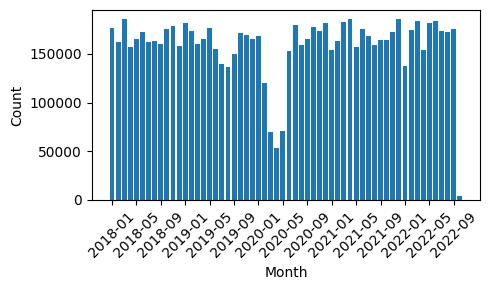

In [38]:
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(counts.index.strftime('%Y-%m'), counts['ACCT_NBR'])
ax.set_xlabel('Month')
ax.set_ylabel('Count')
tick_positions = range(len(counts.index))[::4]  # Every third position
tick_labels = counts.index.strftime('%Y-%m')[::4]  # Every third label
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45)
plt.tight_layout()
plt.savefig('Fig1_counts_per_month.pdf')

In [13]:
ttt

NameError: name 'ttt' is not defined

In [39]:
counts = df1['SUCCESSOR'].value_counts()
counts

1     3786024
2     2402543
3     1217280
4      726473
5      441745
6      267802
7      158918
8       90341
9       50270
10      26970
11      14657
12       8114
13       4407
14       2334
15       1396
16        828
17        496
18        283
19        252
20        107
22         65
21         42
23         19
33         12
24          7
27          4
25          3
26          2
Name: SUCCESSOR, dtype: int64

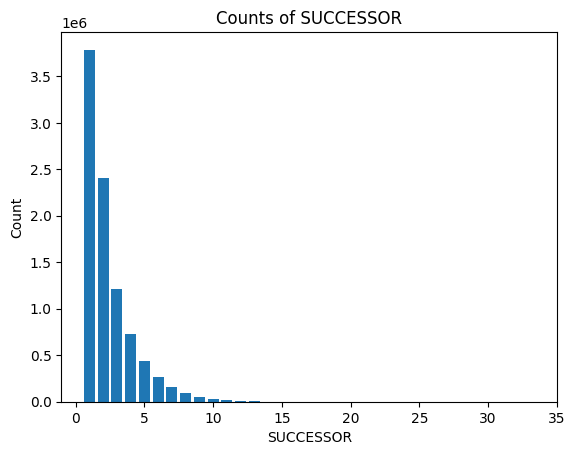

In [40]:
fig, ax = plt.subplots()
ax.bar(counts.index, counts)
ax.set_xlabel('SUCCESSOR')
ax.set_ylabel('Count')
ax.set_title('Counts of SUCCESSOR')
plt.show()

In [41]:
min(df1['CSS_MS_HS_USE']), max(df1['CSS_MS_HS_USE'])

(0, 80000141)

In [42]:
len(df1.loc[df1.CSS_MS_HS_USE >= 3_000])

496215

In [43]:
tmp = df1.loc[df1.CSS_MS_HS_USE < 2_000]
tmp = tmp.loc[tmp.CSS_MS_HS_USE > 1]

In [44]:
bin_edges = np.histogram_bin_edges(tmp.CSS_MS_HS_USE, bins='auto')

In [45]:
len(bin_edges)

276

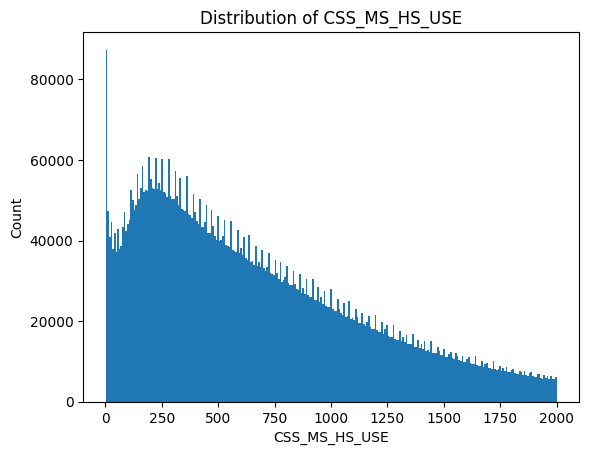

In [46]:
plt.hist(df1['CSS_MS_HS_USE'], bins=bin_edges)
plt.xlabel('CSS_MS_HS_USE')
plt.ylabel('Count')
plt.title('Distribution of CSS_MS_HS_USE')
plt.show()

In [47]:
df2 = pd.read_csv("../dataset/TRAIN_PowerThefts.csv")

In [48]:
df2.head(2)

,ACCT_NBR,SUCCESSOR,ΤΡΟΠΟΣ_ΕΝΤΟΠΙΣΜΟΥ,ΣΗΜΕΙΟ_ΕΝΤΟΠΙΣΜΟΥ,HMANAF,INITIAL_DETECTION_DATE,DETECTION_DATE,NON_REGISTERED_ENERGY
0,416,3,Μέσω Λοιπών Εργασιών & Συντήρησης,ΑΓΝΩΣΤΟ,2018-03-01,2018-01-03,2018-01-03,1283.0
1,678,8,Μέσω Καταμέτρησης (ΔΑΚ),ΑΚΡΟΔΕΚΤΕΣ,2018-08-16,2018-11-01,2018-11-01,640.0


In [49]:
df2.ΤΡΟΠΟΣ_ΕΝΤΟΠΙΣΜΟΥ.unique()

array(['Μέσω Λοιπών Εργασιών & Συντήρησης', 'Μέσω Καταμέτρησης (ΔΑΚ)',
       'Μέσω Στοχευμένων Ελέγχων', 'ΑΓΝΩΣΤΟΣ'], dtype=object)

In [50]:
df2.ΣΗΜΕΙΟ_ΕΝΤΟΠΙΣΜΟΥ.unique()

array(['ΑΓΝΩΣΤΟ', 'ΑΚΡΟΔΕΚΤΕΣ', 'ΜΗΧΑΝΙΣΜΟΣ ΜΕΤΡΗΣΗΣ', 'ΚΙΒΩΤΙΟ ΔΟΚΙΜΩΝ',
       'ΑΠΕΥΘΕΙΑΣ  ΑΠΟ ΤΟ ΔΙΚΤΥΟ'], dtype=object)

In [51]:
len(df2)

3841

In [52]:
df2.ACCT_NBR.nunique()

3600

In [53]:
df2.dtypes

ACCT_NBR                    int64
SUCCESSOR                   int64
ΤΡΟΠΟΣ_ΕΝΤΟΠΙΣΜΟΥ          object
ΣΗΜΕΙΟ_ΕΝΤΟΠΙΣΜΟΥ          object
HMANAF                     object
INITIAL_DETECTION_DATE     object
DETECTION_DATE             object
NON_REGISTERED_ENERGY     float64
dtype: object

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3841 entries, 0 to 3840
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ACCT_NBR                3841 non-null   int64  
 1   SUCCESSOR               3841 non-null   int64  
 2   ΤΡΟΠΟΣ_ΕΝΤΟΠΙΣΜΟΥ       3841 non-null   object 
 3   ΣΗΜΕΙΟ_ΕΝΤΟΠΙΣΜΟΥ       3841 non-null   object 
 4   HMANAF                  3841 non-null   object 
 5   INITIAL_DETECTION_DATE  3840 non-null   object 
 6   DETECTION_DATE          3840 non-null   object 
 7   NON_REGISTERED_ENERGY   2056 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 240.2+ KB


In [55]:
df2['DETECTION_DATE'] = pd.to_datetime(df2['DETECTION_DATE'])

In [56]:
df2.head()

,ACCT_NBR,SUCCESSOR,ΤΡΟΠΟΣ_ΕΝΤΟΠΙΣΜΟΥ,ΣΗΜΕΙΟ_ΕΝΤΟΠΙΣΜΟΥ,HMANAF,INITIAL_DETECTION_DATE,DETECTION_DATE,NON_REGISTERED_ENERGY
0,416,3,Μέσω Λοιπών Εργασιών & Συντήρησης,ΑΓΝΩΣΤΟ,2018-03-01,2018-01-03,2018-01-03,1283.0
1,678,8,Μέσω Καταμέτρησης (ΔΑΚ),ΑΚΡΟΔΕΚΤΕΣ,2018-08-16,2018-11-01,2018-11-01,640.0
2,957,2,Μέσω Λοιπών Εργασιών & Συντήρησης,ΜΗΧΑΝΙΣΜΟΣ ΜΕΤΡΗΣΗΣ,2018-12-05,2018-12-18,2018-12-18,4665.0
3,20201,2,Μέσω Λοιπών Εργασιών & Συντήρησης,ΑΚΡΟΔΕΚΤΕΣ,2017-01-19,2017-01-30,2017-01-30,NaN
4,2140,5,Μέσω Λοιπών Εργασιών & Συντήρησης,ΑΓΝΩΣΤΟ,2019-05-29,2019-05-29,2019-05-29,1049.0


In [57]:
df2[df2.DETECTION_DATE.isnull()]

,ACCT_NBR,SUCCESSOR,ΤΡΟΠΟΣ_ΕΝΤΟΠΙΣΜΟΥ,ΣΗΜΕΙΟ_ΕΝΤΟΠΙΣΜΟΥ,HMANAF,INITIAL_DETECTION_DATE,DETECTION_DATE,NON_REGISTERED_ENERGY
3663,491155,3,ΑΓΝΩΣΤΟΣ,ΑΚΡΟΔΕΚΤΕΣ,2022-02-14,NaN,NaT,NaN


In [58]:
counts = df2['SUCCESSOR'].value_counts()
counts

2     926
3     704
1     697
4     509
5     370
6     238
7     148
8      98
9      53
10     35
11     30
12     12
13      7
14      5
16      2
18      2
15      2
19      1
17      1
21      1
Name: SUCCESSOR, dtype: int64

In [59]:
counts = df2.resample('Y', on='DETECTION_DATE').count()
counts.head()

,ACCT_NBR,SUCCESSOR,ΤΡΟΠΟΣ_ΕΝΤΟΠΙΣΜΟΥ,ΣΗΜΕΙΟ_ΕΝΤΟΠΙΣΜΟΥ,HMANAF,INITIAL_DETECTION_DATE,NON_REGISTERED_ENERGY
DETECTION_DATE,,,,,,,
2011-12-31,1,1,1,1,1,1,0
2012-12-31,6,6,6,6,6,6,0
2013-12-31,9,9,9,9,9,9,0
2014-12-31,47,47,47,47,47,47,1
2015-12-31,171,171,171,171,171,171,14


In [65]:
counts.tail()

,ACCT_NBR,SUCCESSOR,ΤΡΟΠΟΣ_ΕΝΤΟΠΙΣΜΟΥ,ΣΗΜΕΙΟ_ΕΝΤΟΠΙΣΜΟΥ,HMANAF,INITIAL_DETECTION_DATE,NON_REGISTERED_ENERGY
DETECTION_DATE,,,,,,,
2018-12-31,746,746,746,746,746,746,693
2019-12-31,624,624,624,624,624,624,496
2020-12-31,458,458,458,458,458,458,271
2021-12-31,475,475,475,475,475,475,223
2022-12-31,438,438,438,438,438,438,36


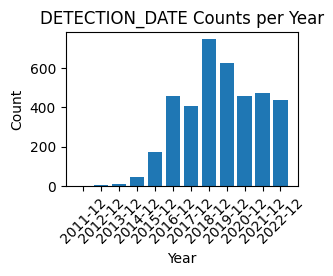

In [63]:
fig, ax = plt.subplots(figsize=(3,2))
ax.bar(counts.index.strftime('%Y-%m'), counts['ACCT_NBR'])
ax.set_xlabel('Year')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [66]:
df3 = pd.read_csv("../dataset/TRAIN_Records.csv")

In [67]:
df3.head()

,ACCT_NBR,SUCCESSOR,VOLTAGE,PARNO,XRHSH,CONTRACT_CAPACITY,ACCT_CONTROL,ACCT_WGS84_X,ACCT_WGS84_Y
0,0,1,LOW,0,2,12.0,0,"53,422551543686701","19,592757873078753"
1,1,1,LOW,0,2,12.0,0,"53,407108521588633","19,569743639932696"
2,1,3,LOW,2,2,25.0,0,"53,407108521588633","19,569743639932696"
3,1,4,LOW,2,2,25.0,0,"53,407108521588633","19,569743639932696"
4,1,5,LOW,2,2,25.0,0,"53,407108521588633","19,569743639932696"


In [68]:
df3.VOLTAGE.value_counts()

LOW    1233327
MED       1182
Name: VOLTAGE, dtype: int64

In [69]:
df3.ACCT_NBR.nunique()

490664

In [70]:
df3.ACCT_CONTROL.value_counts()

0    1221098
1      12229
2       1182
Name: ACCT_CONTROL, dtype: int64

In [71]:
df3.drop_duplicates(subset=['ACCT_NBR']).ACCT_CONTROL.value_counts()

0    485623
1      4571
2       470
Name: ACCT_CONTROL, dtype: int64

In [72]:
df3.ACCT_CONTROL.value_counts()

0    1221098
1      12229
2       1182
Name: ACCT_CONTROL, dtype: int64

In [73]:
df3.CONTRACT_CAPACITY.value_counts()

12.0     782696
25.0     362046
35.0      36498
15.0      23658
8.0       13272
55.0       8811
85.0       3564
135.0      2665
250.0       117
Name: CONTRACT_CAPACITY, dtype: int64

In [74]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234509 entries, 0 to 1234508
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ACCT_NBR           1234509 non-null  int64  
 1   SUCCESSOR          1234509 non-null  int64  
 2   VOLTAGE            1234509 non-null  object 
 3   PARNO              1234509 non-null  int64  
 4   XRHSH              1234509 non-null  int64  
 5   CONTRACT_CAPACITY  1233327 non-null  float64
 6   ACCT_CONTROL       1234509 non-null  int64  
 7   ACCT_WGS84_X       1234509 non-null  object 
 8   ACCT_WGS84_Y       1234509 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 84.8+ MB


In [75]:
counts = df3['CONTRACT_CAPACITY'].value_counts()
counts

12.0     782696
25.0     362046
35.0      36498
15.0      23658
8.0       13272
55.0       8811
85.0       3564
135.0      2665
250.0       117
Name: CONTRACT_CAPACITY, dtype: int64

In [76]:
counts = df3['XRHSH'].value_counts()
counts

1    977557
2    242154
4      9420
6      3459
5      1208
8       631
3        49
7        31
Name: XRHSH, dtype: int64

In [77]:
df4 = pd.read_csv("../dataset/TRAIN_Representations.csv")

In [78]:
df4.head()

,ACCT_NBR,SUCCESSOR,SUPPLIER,SUPPLIER_TO,START_DATE,END_DATE
0,123622,4,W,NaN,2017-04-04,2022-07-19
1,123623,1,Δ,NaN,1995-10-18,1999-12-22
2,123623,4,Δ,Δ,2019-11-06,2020-06-23
3,123623,5,Δ,NaN,2020-06-23,2022-09-16
4,123624,1,Δ,Δ,1995-10-15,2000-01-13


In [79]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232180 entries, 0 to 1232179
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   ACCT_NBR     1232180 non-null  int64 
 1   SUCCESSOR    1232180 non-null  int64 
 2   SUPPLIER     1232180 non-null  object
 3   SUPPLIER_TO  496905 non-null   object
 4   START_DATE   1232180 non-null  object
 5   END_DATE     1232180 non-null  object
dtypes: int64(2), object(4)
memory usage: 56.4+ MB


In [80]:
counts = df4['SUPPLIER'].value_counts()
counts

Δ    1010639
L      44483
W      41297
Η      27130
C      20165
Ω      17011
J      16226
Κ      16056
Σ      14732
Ξ       6164
R       4145
Φ       3559
U       1742
G       1606
V       1486
B       1251
Λ       1193
Z        618
e        555
1        475
2        455
3        402
4        255
θ        183
π        104
Γ         64
S         46
Ο         46
E         27
s         21
9         13
F         11
P          8
Τ          6
N          5
Π          1
Name: SUPPLIER, dtype: int64

In [81]:
df5 = pd.read_csv("../dataset/Train_Requests.csv")

In [82]:
df5.head()

,ACCT_NBR,SUCCESSOR,REQUEST_TYPE,REQUEST_DATE,COMPL_REQUEST_STATUS,COMPLETION_DATE
0,493073,7,recon,2019-02-12,compl,2019-02-13
1,15120,3,NaN,2015-05-26,compl,2015-05-28
2,15120,4,NaN,2017-02-06,NaN,2017-03-14
3,15120,5,discon,2018-06-28,compl,2018-09-27
4,15120,5,reprChange,2018-09-27,compl,2018-10-02


In [83]:
len(df5)

2346360

In [84]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346360 entries, 0 to 2346359
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ACCT_NBR              int64 
 1   SUCCESSOR             int64 
 2   REQUEST_TYPE          object
 3   REQUEST_DATE          object
 4   COMPL_REQUEST_STATUS  object
 5   COMPLETION_DATE       object
dtypes: int64(2), object(4)
memory usage: 107.4+ MB


In [85]:
counts = df5['REQUEST_TYPE'].value_counts()
counts

discon        602350
reprChange    502863
recon         417817
reprPause     339523
newCon         50791
Name: REQUEST_TYPE, dtype: int64

In [86]:
df5['REQUEST_DATE'] = pd.to_datetime(df5['REQUEST_DATE'])

In [87]:
min(df5['REQUEST_DATE']), max(df5['REQUEST_DATE'])

(Timestamp('2012-01-09 00:00:00'), Timestamp('2022-10-04 00:00:00'))

In [88]:
counts = df5.resample('M', on='REQUEST_DATE').count()

In [89]:
counts.head()

,ACCT_NBR,SUCCESSOR,REQUEST_TYPE,COMPL_REQUEST_STATUS,COMPLETION_DATE
REQUEST_DATE,,,,,
2012-01-31,193,193,193,1,193
2012-02-29,1057,1057,58,993,1057
2012-03-31,3148,3148,79,3020,3148
2012-04-30,4050,4050,33,3591,4050
2012-05-31,3369,3369,86,353,3369


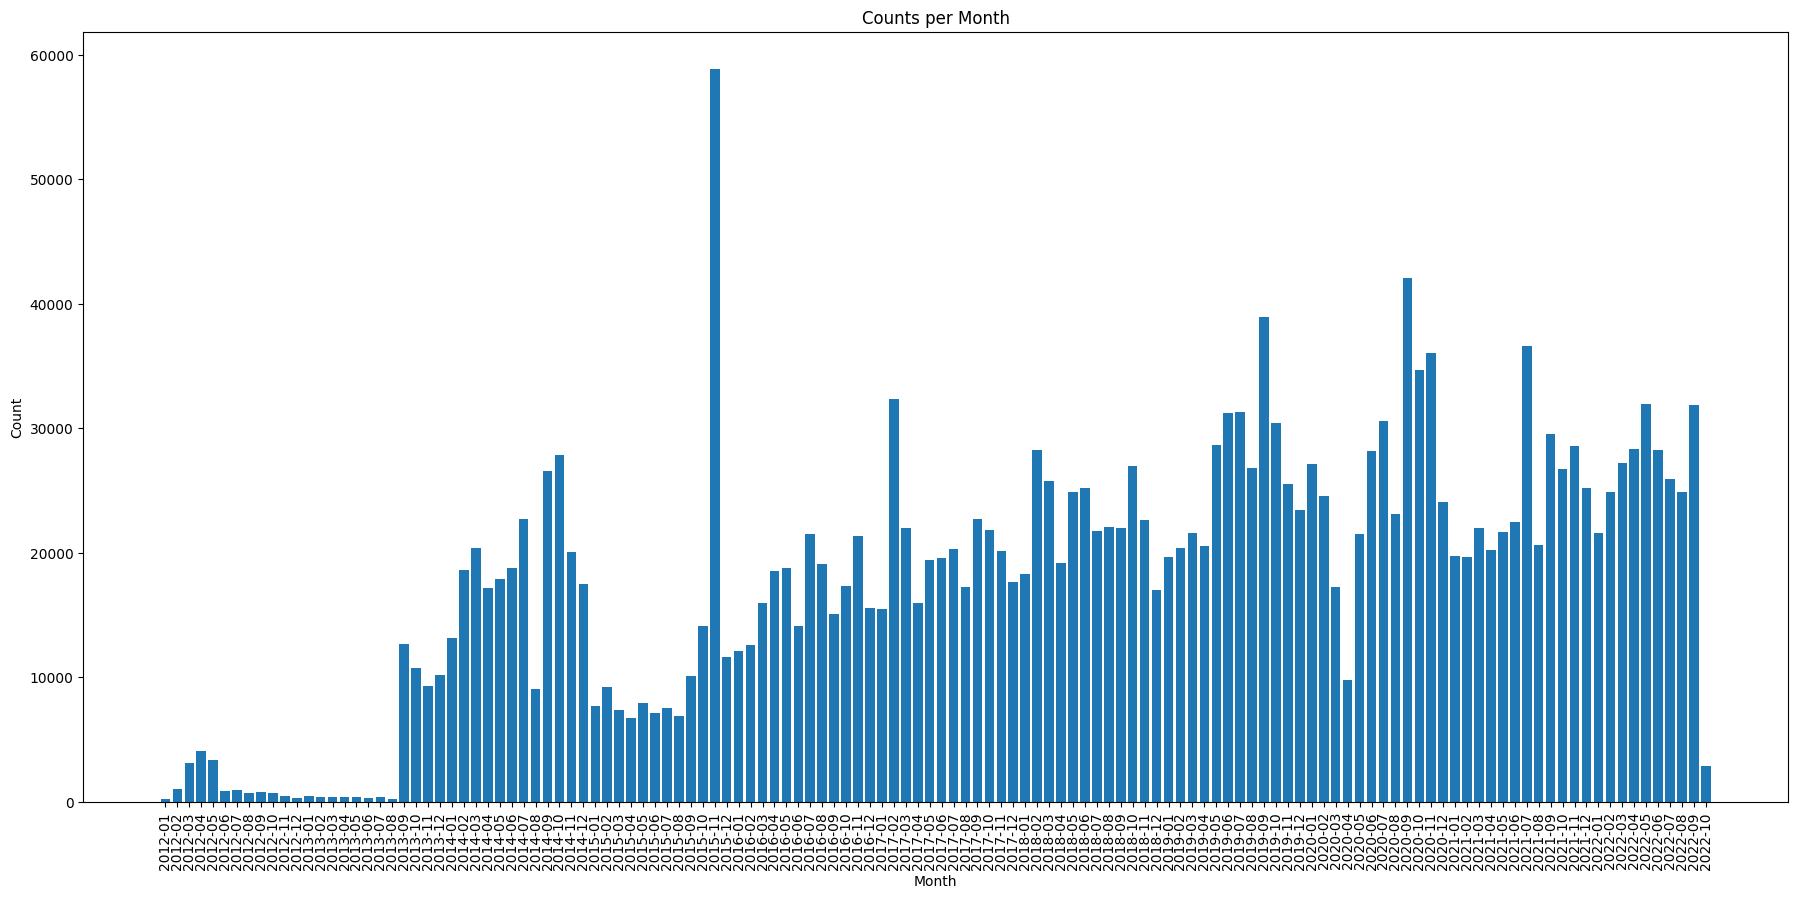

In [90]:
fig, ax = plt.subplots(figsize=(22,10))
ax.bar(counts.index.strftime('%Y-%m'), counts['ACCT_NBR'])
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Counts per Month')
plt.xticks(rotation=90)
plt.show()

In [91]:
from itertools import combinations

In [92]:
dfs = [df1, df2, df3, df4, df5]

In [93]:
tt = [0, 1, 2, 3, 4]
list(combinations(tt, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [94]:
# [(df1, df2), (df1, df3), (df1, df4), (df1, df5)
#  (df2, df3), (df2, df4), (df2, df5),
#  (df3, df4), (df3, df5), (df4, df5)]

# df1=consumptions, df2 = powertheft, df3=records
# df4=representations, df5=requests
comb = list(combinations(dfs, 2))

In [95]:
for i, c in enumerate(comb):
    
    tmp1 = c[0]
    tmp2 = c[1]
    
    uniq1 = set(tmp1['ACCT_NBR'].unique())
    uniq2 = set(tmp2['ACCT_NBR'].unique())
    
    diff1 = len(uniq1 - uniq2)
    diff2 = len(uniq2 - uniq1)
    
    if len(uniq1) == 459826:
        name1 = "consumptions"
    elif len(uniq1) == 3600:
        name1 = "powerthefts"
    elif len(uniq1) == 492339:
        name1 = "records"
    elif len(uniq1) == 490664:
        name1 = "representations"
    else:
        name1 = "requests"
        
    if len(uniq2) == 459826:
        name2 = "consumptions"
    elif len(uniq2) == 3600:
        name2 = "powerthefts"
    elif len(uniq2) == 492339:
        name2 = "records"
    elif len(uniq2) == 490664:
        name2 = "representations"
    else:
        name2 = "requests"
    
    
    print("Combination", i)
    print(f"Unique ACCT_NBR in {name1}: {len(uniq1)}")
    print(f"Unique ACCT_NBR in the {name2}: {len(uniq2)}")
    print(f"Number of unique ACCT_NBR in {name1} but not in {name2}: {diff1}")
    print(f"Number of unique ACCT_NBR in {name2} df but not in {name1}: {diff2}")
    print("")

Combination 0
Unique ACCT_NBR in consumptions: 459826
Unique ACCT_NBR in the powerthefts: 3600
Number of unique ACCT_NBR in consumptions but not in powerthefts: 456417
Number of unique ACCT_NBR in powerthefts df but not in consumptions: 191

Combination 1
Unique ACCT_NBR in consumptions: 459826
Unique ACCT_NBR in the representations: 490664
Number of unique ACCT_NBR in consumptions but not in representations: 389
Number of unique ACCT_NBR in representations df but not in consumptions: 31227

Combination 2
Unique ACCT_NBR in consumptions: 459826
Unique ACCT_NBR in the records: 492339
Number of unique ACCT_NBR in consumptions but not in records: 452
Number of unique ACCT_NBR in records df but not in consumptions: 32965

Combination 3
Unique ACCT_NBR in consumptions: 459826
Unique ACCT_NBR in the requests: 653066
Number of unique ACCT_NBR in consumptions but not in requests: 238217
Number of unique ACCT_NBR in requests df but not in consumptions: 431457

Combination 4
Unique ACCT_NBR in p